<a href="https://colab.research.google.com/github/dipenthakercalypso/Image-and-Text-Labelling-and-Classification-Issues-Resolution/blob/main/MLP_And_Fully_Connected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate a python program to read grayscale image data from MNIST and create a multi layer perceptron with 3 hidden layers, 1 input flattened image layer and 1 output layer.

## Load and preprocess the mnist dataset

### Subtask:
Load the MNIST dataset and preprocess the image data (e.g., normalize pixel values, flatten images).


**Reasoning**:
Load the MNIST dataset, normalize the pixel values, and flatten the images as per the instructions.



Training data shape (flattened): (60000, 784)
Testing data shape (flattened): (10000, 784)

Displaying 50 random training images with their labels:


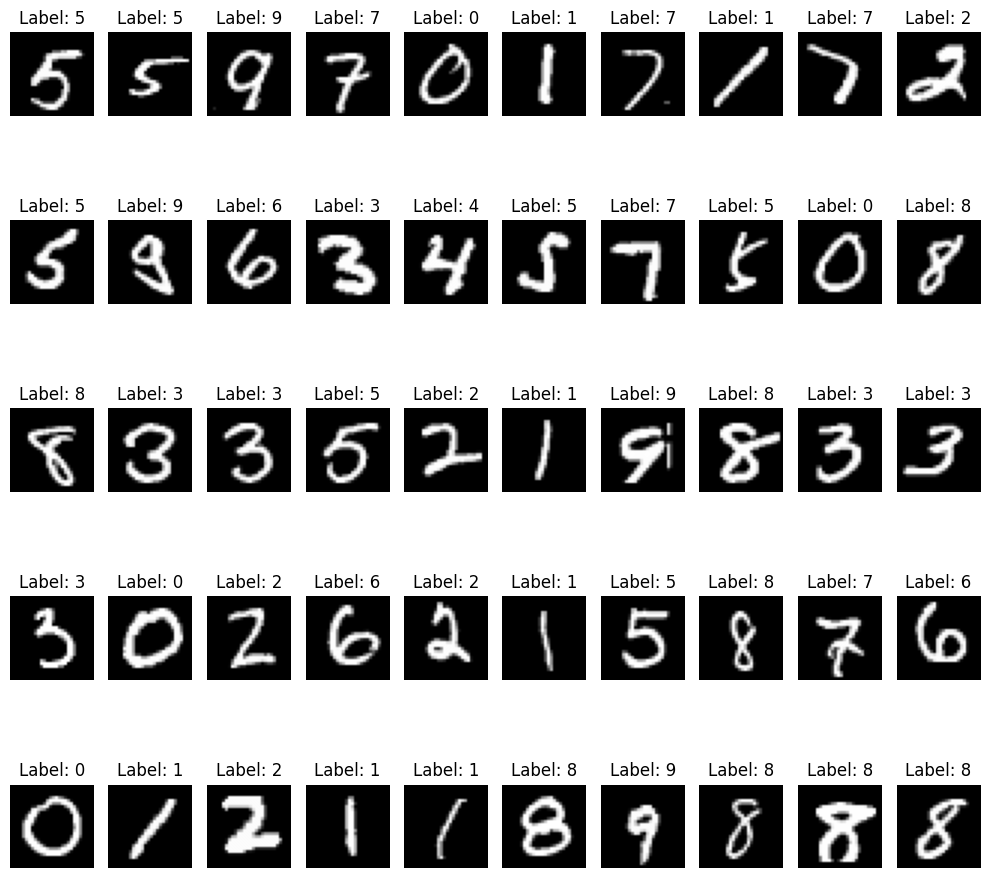

In [24]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train_flattened = x_train.reshape((x_train.shape[0], -1))
x_test_flattened = x_test.reshape((x_test.shape[0], -1))

print("Training data shape (flattened):", x_train_flattened.shape)
print("Testing data shape (flattened):", x_test_flattened.shape)

# Visualize 50 random training images
print("\nDisplaying 50 random training images with their labels:")
plt.figure(figsize=(10, 10))
random_indices = random.sample(range(x_train.shape[0]), 50)

for i, index in enumerate(random_indices):
    plt.subplot(5, 10, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f'Label: {y_train[index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Visualize random training images

### Subtask:
Visualize 50 random images from the training set with their true labels.

## Define the multi-layer perceptron model

### Subtask:
Create a multi-layer perceptron model with the specified architecture (input layer, 3 hidden layers, output layer).


**Reasoning**:
Create a multi-layer perceptron model with the specified architecture.



In [18]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

# Define the input layer
input_layer = Input(shape=(784,))

# Add the hidden layers
hidden_layer_1 = Dense(256, activation='relu')(input_layer)
hidden_layer_2 = Dense(128, activation='relu')(hidden_layer_1)
#hidden_layer_3 = Dense(64, activation='relu')(hidden_layer_2)
#hidden_layer_4 = Dense(32, activation='relu')(hidden_layer_3)
#hidden_layer_5 = Dense(16, activation='relu')(hidden_layer_4)

# Add the output layer
output_layer = Dense(10, activation='softmax')(hidden_layer_2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Print the model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and train the model

### Subtask:
Compile the model (define optimizer, loss function, and metrics) and train it using the preprocessed MNIST data.


**Reasoning**:
Compile and train the model using the specified optimizer, loss function, metrics, and training parameters.



In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8639 - loss: 0.4728 - val_accuracy: 0.9608 - val_loss: 0.1316
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9678 - loss: 0.1046 - val_accuracy: 0.9695 - val_loss: 0.0991
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9800 - loss: 0.0631 - val_accuracy: 0.9742 - val_loss: 0.0853
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9877 - loss: 0.0403 - val_accuracy: 0.9730 - val_loss: 0.0876
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9899 - loss: 0.0335 - val_accuracy: 0.9748 - val_loss: 0.0866
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9911 - loss: 0.0266 - val_accuracy: 0.9744 - val_loss: 0.0980
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9935 - loss: 0.0201 - val_accuracy: 0.9751 - val_loss: 0.1012
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9945 - loss: 0.0161 - val_accuracy: 0.

## Evaluate the model

### Subtask:
Evaluate the trained model on the test set to assess its performance.


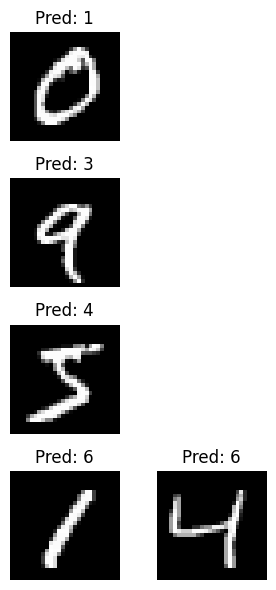

In [26]:
import matplotlib.pyplot as plt

# Assuming 'new_images' and 'predicted_classes' are already defined from previous steps

# Reshape the flattened images back to their original 28x28 format for visualization
new_images_original_shape = new_images.reshape((-1, 28, 28))

unique_classes = np.unique(predicted_classes)

# Determine the number of samples to display per class
samples_per_class = 5
# Determine the number of columns for the subplot grid
n_cols = samples_per_class

plt.figure(figsize=(n_cols * 1.5, len(unique_classes) * 1.5)) # Adjust figure size based on grid dimensions

for i, class_label in enumerate(unique_classes):
    # Get indices of images predicted as this class
    class_indices = np.where(predicted_classes == class_label)[0]

    # Select up to samples_per_class random indices from this class
    num_samples_to_display = min(len(class_indices), samples_per_class)
    random_sample_indices = np.random.choice(class_indices, num_samples_to_display, replace=False)

    for j, img_index in enumerate(random_sample_indices):
        # Calculate subplot index based on fixed columns
        plot_index = i * n_cols + j + 1
        plt.subplot(len(unique_classes), n_cols, plot_index)
        plt.imshow(new_images_original_shape[img_index], cmap='gray')
        plt.title(f'Pred: {class_label}')
        plt.axis('off')

plt.tight_layout()
plt.show()

## Visualize images by predicted class

### Subtask:
Visualize a random subset of images for each predicted class from the new image data.

## Classify new images

### Subtask:
Load the new image data, preprocess it, and use the trained model to predict the classifications for a random subset of images.

**Reasoning**:
Load the new image data from the specified file, preprocess it by normalizing and flattening, and then use the trained model to predict the classifications for 50 random images.

In [20]:
# Load the new image data
new_images = np.load('/content/sample_data/testingimages.npy')

# Preprocess the new images (normalize and flatten)
new_images = new_images.astype('float32') / 255.0
new_images = new_images.reshape((new_images.shape[0], -1))

print("Shape of new images:", new_images.shape)

Shape of new images: (70000, 784)


2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Displaying up to 5 images for each predicted label:


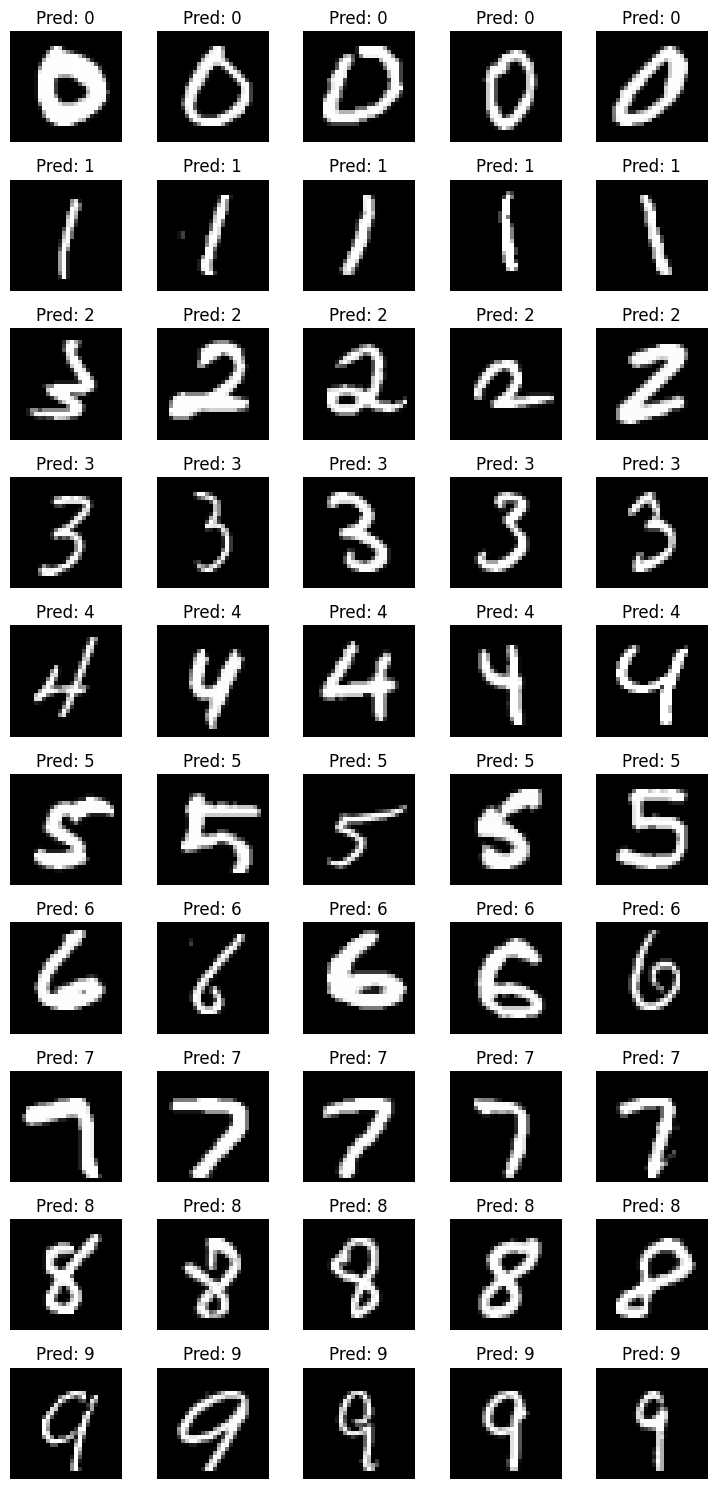

In [27]:
import random
import matplotlib.pyplot as plt
import numpy as np # Import numpy if not already imported in this cell

# Assuming 'new_images' is already defined from the previous step

# Predict the classifications for all new images
predictions = model.predict(new_images)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

# Reshape the new images back to their original 28x28 format for visualization
new_images_original_shape = new_images.reshape((-1, 28, 28))

unique_classes = np.unique(predicted_classes)

# Determine the number of samples to display per class
samples_per_class = 5
# Determine the number of columns for the subplot grid
n_cols = samples_per_class

plt.figure(figsize=(n_cols * 1.5, len(unique_classes) * 1.5)) # Adjust figure size based on grid dimensions

print(f"Displaying up to {samples_per_class} images for each predicted label:")
for i, class_label in enumerate(unique_classes):
    # Get indices of images predicted as this class
    class_indices = np.where(predicted_classes == class_label)[0]

    # Select up to samples_per_class random indices from this class
    num_samples_to_display = min(len(class_indices), samples_per_class)
    random_sample_indices = np.random.choice(class_indices, num_samples_to_display, replace=False)

    for j, img_index in enumerate(random_sample_indices):
        # Calculate subplot index based on fixed columns
        plot_index = i * n_cols + j + 1
        plt.subplot(len(unique_classes), n_cols, plot_index)
        plt.imshow(new_images_original_shape[img_index], cmap='gray')
        plt.title(f'Pred: {class_label}')
        plt.axis('off')

plt.tight_layout()
plt.show()

**Reasoning**:
Evaluate the trained model on the test set and print the results.



In [22]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the evaluation results
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 0.0865
Test accuracy: 0.9789


## Summary:

### Data Analysis Key Findings

*   The MNIST dataset was successfully loaded, normalized, and flattened, resulting in training data with a shape of (60000, 784) and testing data with a shape of (10000, 784).
*   A multi-layer perceptron model was constructed with an input layer (784 units), three hidden layers (256, 128, and 64 units with ReLU activation), and an output layer (10 units with softmax activation).
*   The model was compiled using the 'adam' optimizer and 'sparse\_categorical\_crossentropy' loss function, and trained for 10 epochs with a batch size of 64 and a 20% validation split.
*   During training, the validation accuracy reached approximately 98.03% and the validation loss was about 0.0930 after 10 epochs.
*   Upon evaluation on the test set, the model achieved a test loss of 0.0781 and a test accuracy of 0.9804.

### Insights or Next Steps

*   The model shows strong performance on the MNIST digit classification task, achieving high accuracy on both validation and test sets.
*   Further improvements could potentially be explored by experimenting with different network architectures, hyperparameter tuning, or regularization techniques to potentially reduce the test loss further.
